In [201]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report

In [202]:
path_to_data = "D:/0 Orbit Proyek Akhir/BADUTA-BATITA KEMRANJEN.xlsx" # Path to the Excel file
dataset = pd.read_excel(path_to_data)
dataset.head()

,KodeSampel,NamaBaduta,JenisKelamin,TanggalLahir,UmurBaduta,AnakKe,JumlahAnak,BBLahir,PBLahir,TanggalUkur,...,MerkGaram,BeratGaram,HargaGaram,PmrksaanIodium,VAR00001,VAR00002,VAR00003,VAR00004,VAR00005,Status
0,1101.0,Hana Nur Azizah,2.0,2018-07-16 00:00:00,8.0,1.0,1.0,3.0,50.0,2019-04-10 00:00:00,...,Daun,250.0,2500.0,1.0,1.0,1.0,2.0,2.0,1.0,tidak stunting
1,1102.0,Aqila Shakuena Humaira,2.0,2018-03-13 00:00:00,13.0,1.0,1.0,2.5,47.0,2019-04-10 00:00:00,...,Daun,250.0,2500.0,1.0,2.0,2.0,1.0,1.0,2.0,tidak stunting
2,1103.0,Altan Artanabil Setiawan,1.0,2018-07-09 00:00:00,9.0,2.0,2.0,3.4,50.0,2019-04-10 00:00:00,...,Daun,250.0,2500.0,1.0,1.0,1.0,1.0,2.0,1.0,stunting
3,1104.0,Adrian Pradita Maspuri,1.0,2017-05-25 00:00:00,23.0,1.0,1.0,2.1,39.0,2019-04-10 00:00:00,...,Daun,250.0,2500.0,1.0,2.0,2.0,2.0,2.0,1.0,tidak stunting
4,1105.0,Yaqis Hagata,1.0,2018-06-28 00:00:00,8.0,3.0,3.0,2.9,45.0,2019-04-10 00:00:00,...,Daun,250.0,2500.0,1.0,1.0,1.0,1.0,1.0,2.0,tidak stunting


In [203]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Columns: 172 entries, KodeSampel to Status
dtypes: float64(155), object(17)
memory usage: 748.6+ KB


In [204]:
dataset = dataset[["UmurBaduta", "BBLahir", "PBLahir", "Status"]]
dataset

,UmurBaduta,BBLahir,PBLahir,Status
0,8.0,3.0,50.0,tidak stunting
1,13.0,2.5,47.0,tidak stunting
2,9.0,3.4,50.0,stunting
3,23.0,2.1,39.0,tidak stunting
4,8.0,2.9,45.0,tidak stunting
...,...,...,...,...
552,10.0,3.1,48.0,tidak stunting
553,17.0,2.7,47.0,tidak stunting
554,7.0,3.1,50.0,tidak stunting
555,7.0,3.4,49.0,tidak stunting


In [205]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   UmurBaduta  550 non-null    float64
 1   BBLahir     550 non-null    float64
 2   PBLahir     550 non-null    float64
 3   Status      550 non-null    object 
dtypes: float64(3), object(1)
memory usage: 17.5+ KB


In [206]:
dataset.describe()

,UmurBaduta,BBLahir,PBLahir
count,550.000000,550.000000,550.000000
mean,13.707273,3.005291,48.301273
std,7.384554,0.444960,2.465370
min,1.000000,1.500000,36.000000
25%,8.250000,2.700000,47.000000
50%,13.000000,3.000000,48.000000
75%,20.000000,3.300000,50.000000
max,37.000000,4.200000,58.000000


In [207]:
dataset.isna().sum()

UmurBaduta    7
BBLahir       7
PBLahir       7
Status        7
dtype: int64

In [208]:
dataset.dropna(inplace = True)

In [209]:
dataset.isna().sum()

UmurBaduta    0
BBLahir       0
PBLahir       0
Status        0
dtype: int64

In [210]:
dataset["Status"].value_counts()

tidak stunting    491
stunting           59
Name: Status, dtype: int64

<AxesSubplot:xlabel='Status', ylabel='BBLahir'>

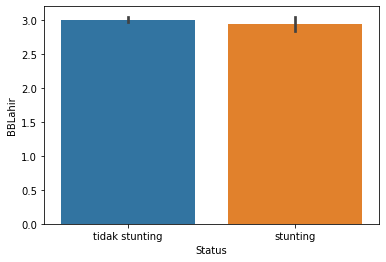

In [243]:
sns.barplot(x='Status', y='BBLahir', data=dataset)

<AxesSubplot:xlabel='Status', ylabel='PBLahir'>

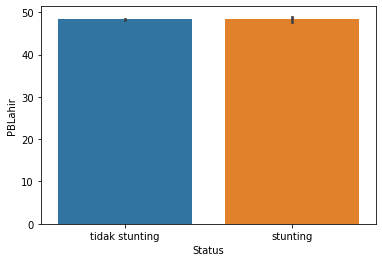

In [255]:
sns.barplot(x='Status', y='PBLahir', data=dataset)

<AxesSubplot:xlabel='Status', ylabel='Density'>

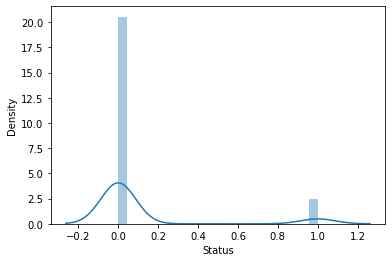

In [252]:
sns.distplot(dataset['Status']=='stunting')

C:\Users\Indah Wardatunizza\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Status', ylabel='Density'>

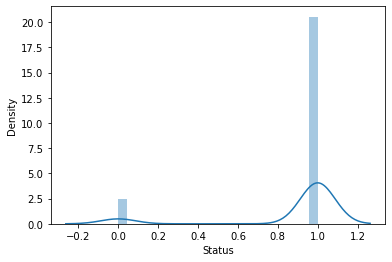

In [253]:
sns.distplot(dataset['Status']=='tidak stunting')

In [256]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [257]:
x

,UmurBaduta,BBLahir,PBLahir
0,8.0,3.0,50.0
1,13.0,2.5,47.0
2,9.0,3.4,50.0
3,23.0,2.1,39.0
4,8.0,2.9,45.0
...,...,...,...
552,10.0,3.1,48.0
553,17.0,2.7,47.0
554,7.0,3.1,50.0
555,7.0,3.4,49.0


In [258]:
y

0      tidak stunting
1      tidak stunting
2            stunting
3      tidak stunting
4      tidak stunting
            ...      
552    tidak stunting
553    tidak stunting
554    tidak stunting
555    tidak stunting
556          stunting
Name: Status, Length: 550, dtype: object

In [259]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [260]:
# model = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=3)
# model = model.fit(x_train, y_train)

model_dt = DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=20)
model_rf = RandomForestClassifier(max_depth=20, random_state=0)
model_logres = LogisticRegression(random_state=0)
model_dt = model_dt.fit(x_train, y_train)
model_rf = model_rf.fit(x_train, y_train)
model_logres = model_logres.fit(x_train, y_train)

In [261]:
accuracy_train_dt = model_dt.score(x_train, y_train)
accuracy_test_dt  = model_dt.score(x_test, y_test)
accuracy_train_rf = model_rf.score(x_train, y_train)
accuracy_test_rf  = model_rf.score(x_test, y_test)
accuracy_train_logres = model_logres.score(x_train, y_train)
accuracy_test_logres  = model_logres.score(x_test, y_test)

In [262]:
print(f"Akurasi Model (Train) : {np.round(accuracy_train_dt * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test_dt * 100,2)} %")

Akurasi Model (Train) : 97.5 %
Akurasi Model (Test)  : 78.18 %


In [263]:
print(f"Akurasi Model (Train) : {np.round(accuracy_train_rf * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test_rf * 100,2)} %")

Akurasi Model (Train) : 97.5 %
Akurasi Model (Test)  : 86.36 %


In [264]:
print(f"Akurasi Model (Train) : {np.round(accuracy_train_logres * 100,2)} %")
print(f"Akurasi Model (Test)  : {np.round(accuracy_test_logres * 100,2)} %")

Akurasi Model (Train) : 90.0 %
Akurasi Model (Test)  : 86.36 %


In [270]:
df_test = pd.DataFrame(data={
    "UmurBaduta" : [3],
    "PBLahir"  : [50],
    "BBLahir"  : [4]
})

df_test[0:1]

,UmurBaduta,PBLahir,BBLahir
0,3,50,4


In [271]:
pred_test = model.predict(df_test[0:1])
pred_test[0]

C:\Users\Indah Wardatunizza\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


'stunting'

In [272]:
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[ 2 13]
 [ 2 93]]


In [273]:
target_names = ["stunting", "tidak stunting"]
print(classification_report(y_test, y_pred, target_names=target_names))

                precision    recall  f1-score   support

      stunting       0.50      0.13      0.21        15
tidak stunting       0.88      0.98      0.93        95

      accuracy                           0.86       110
     macro avg       0.69      0.56      0.57       110
  weighted avg       0.83      0.86      0.83       110

